<a href="https://colab.research.google.com/github/SRDxRestricted/MasterMind_Game/blob/main/placement_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # 1. Project Overview

"""
Goal: Predict placement and analyze factors affecting placements & salary from `Placement_Data_Full_Class.csv`.

Objectives:
- EDA: summary statistics, missing values, correlations
- Visualizations: barplots, histograms, boxplots, heatmap
- ML: simple classification (Logistic Regression / Decision Tree) and regression
"""


'\nGoal: Predict placement and analyze factors affecting placements & salary from `Placement_Data_Full_Class.csv`.\n\nObjectives:\n- EDA: summary statistics, missing values, correlations\n- Visualizations: barplots, histograms, boxplots, heatmap\n- ML: simple classification (Logistic Regression / Decision Tree) and regression\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 2. Setup & Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix

In [ ]:
# 3. Loaded Data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Placement_Data_Full_Class.csv")

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


Top 5 rows of the Dataframe are:
   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  

Number of rows: 215
Number of columns: 15

Missing values in each column:
sl_no          

/tmp/ipython-input-2015456902.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', palette='viridis')


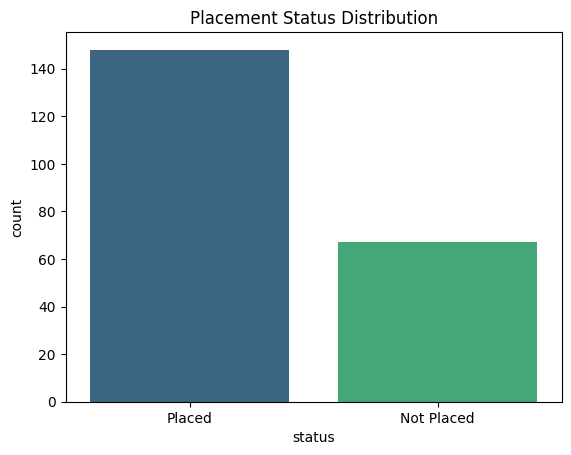

                ssc_p      hsc_p   degree_p      mba_p
status                                                
Not Placed  57.544030  58.395522  61.134179  61.612836
Placed      71.721486  69.926554  68.740541  62.579392


/tmp/ipython-input-2015456902.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y=col, palette='coolwarm')


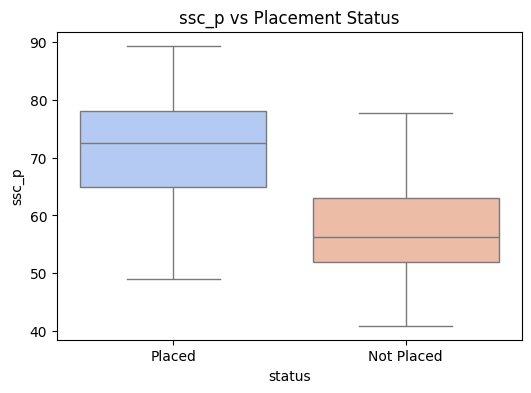

/tmp/ipython-input-2015456902.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y=col, palette='coolwarm')


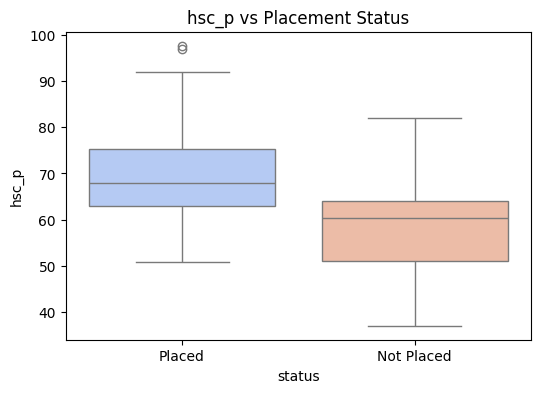

/tmp/ipython-input-2015456902.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y=col, palette='coolwarm')


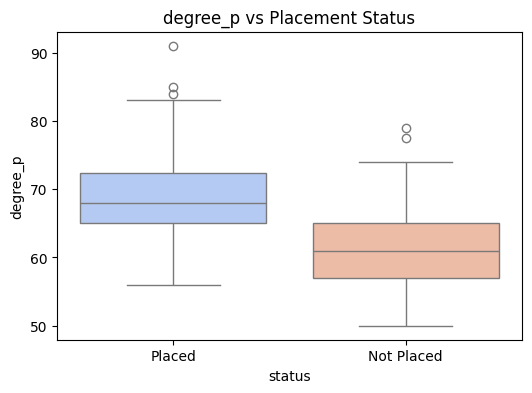

/tmp/ipython-input-2015456902.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y=col, palette='coolwarm')


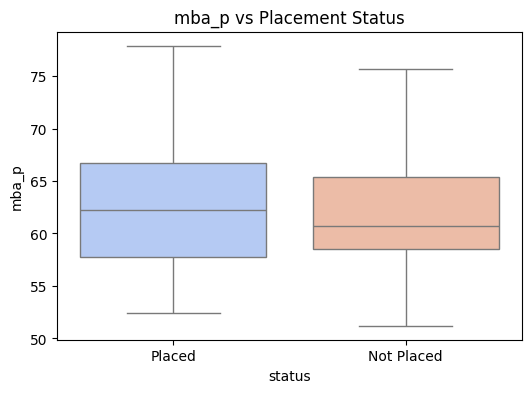

In [ ]:


# 4. Exploratory Data Analysis (EDA)

# Preview data
print("Top 5 rows of the Dataframe are:")
print(df.head())

# Shape of dataset
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

#S Count of Placed vs Not Placed
print(df['status'].value_counts())

# Visualization
sns.countplot(data=df, x='status', palette='viridis')
plt.title("Placement Status Distribution")
plt.show()

# Average scores by placement status
score_cols = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']
print(df.groupby('status')[score_cols].mean())

# Visualization
for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='status', y=col, palette='coolwarm')
    plt.title(f"{col} vs Placement Status")
    plt.show()



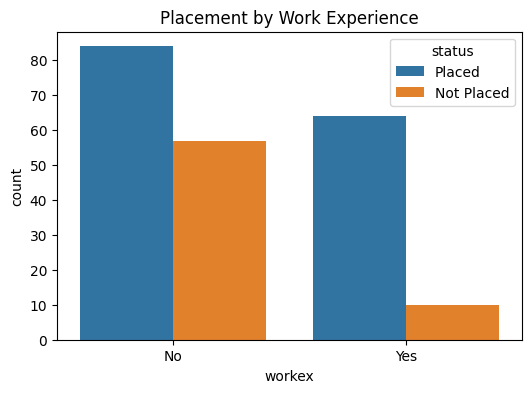

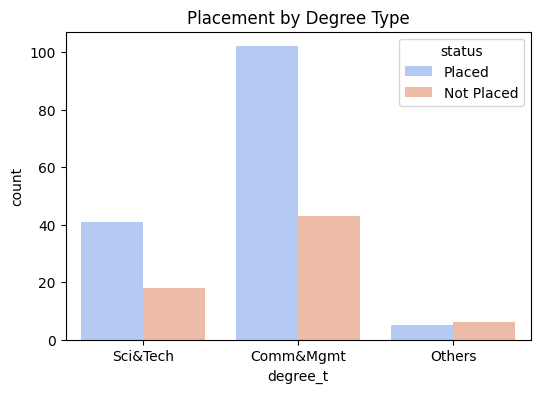

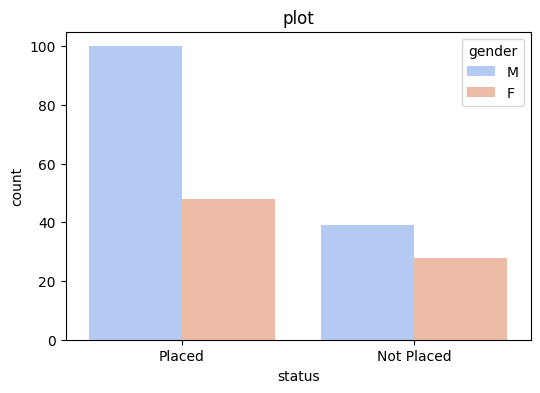

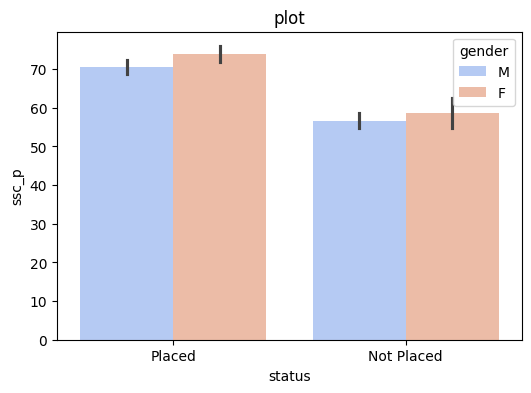

In [ ]:
# 5. Visualizations

# Placement by work experience
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='workex',hue = "status")
plt.title("Placement by Work Experience")
plt.show()

print("\n")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="degree_t",hue = "status", palette='coolwarm')
plt.title("Placement by Degree Type")
plt.show()

print("\n")

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = "status", hue = "gender", palette = "coolwarm")
plt.title("plot")
plt.show()

print("\n")

plt.figure(figsize=(6,4))
sns.barplot(data = df, x = "status",y = "ssc_p", hue = "gender", palette = "coolwarm")
plt.title("plot")
plt.show()

In [ ]:
# 6. Preparing Data

df = df.drop(["sl_no", "salary"], axis=1)
le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])   # Placed = 1, Not Placed = 0
df = pd.get_dummies(df, drop_first=True)
X = df.drop("status", axis=1)
y = df["status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# 7. Machine Learning

## 7.1 Classification (Placement)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.predict(X_test[:10])

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
# 8. Model Evaluation

student_data = X_test.iloc[3].values.reshape(1, -1)

# Predict placement
prediction = model.predict(student_data)[0]
print("Predicted status:", "Placed" if prediction == 1 else "Not Placed")
